In [63]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [73]:
data = pd.read_csv('merge_data_update.csv', index_col=0)

In [76]:
data = data.loc[data['GrLivArea'] < 3000]

In [78]:
data['GrLivArea'].mean()

#Round up to 1500

1472.7296137339056

In [79]:
blw_avg = data.loc[data['GrLivArea'] < 1500]

In [82]:
abv_avg = data.loc[ data['GrLivArea'] > 1500]

In [83]:
x_abv = np.array(abv_avg['GrLivArea']).reshape((-1,1))
y_abv = np.array(abv_avg['SalePrice'])
x_blw = np.array(blw_avg['GrLivArea']).reshape((-1,1))
y_blw = np.array(blw_avg['SalePrice'])

# Simple Linear Regression

### Below Avg

In [86]:
lm = LinearRegression()
lm.fit(x_blw, y_blw)

LinearRegression()

In [87]:
print('r2:',lm.score(x_blw, y_blw))
print('intercept:', lm.intercept_)
print('slope:',lm.coef_)

r2: 0.34569646432762413
intercept: 24022.467677603752
slope: [101.2318622]


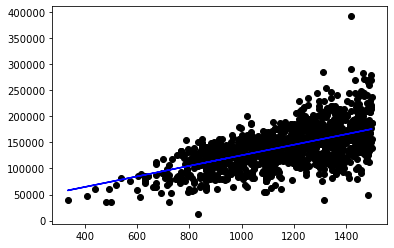

In [89]:
plt.scatter(x_blw, y_blw, c='black')
plt.plot(x_blw, lm.predict(x_blw), c='blue')

### Above Avg

In [90]:
lm = LinearRegression()
lm.fit(x_abv, y_abv)

LinearRegression()

In [91]:
print('r2:',lm.score(x_abv, y_abv))
print('intercept:', lm.intercept_)
print('slope:',lm.coef_)

r2: 0.2342669845726595
intercept: 8638.214157669281
slope: [113.52089324]


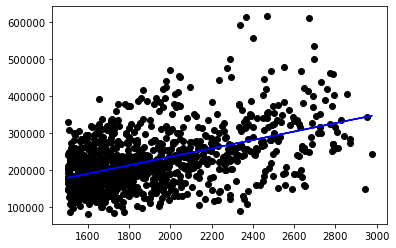

In [92]:
plt.scatter(x_abv, y_abv, c='black')
plt.plot(x_abv, lm.predict(x_abv), c='blue')

# Box-Cox Transformed

### Below Avg

In [93]:
ytb, a_valb = stats.boxcox(y_blw)

In [94]:
lm.fit(x_blw, ytb.reshape((-1, 1)))

LinearRegression()

In [95]:
print('r2:',lm.score(x_blw, ytb.reshape((-1,1))))
print('intercept:', lm.intercept_)
print('slope:',lm.coef_)
print('alpha value:', a_valb)

r2: 0.3520172101105994
intercept: [1309.95490257]
slope: [[1.31438183]]
alpha value: 0.632459001377142


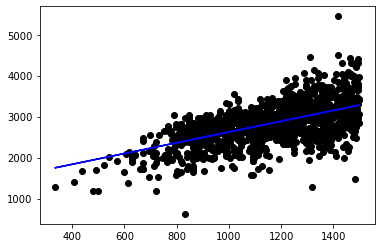

In [97]:
plt.plot(x_blw, lm.predict(x_blw), c='blue')
plt.scatter(x_blw, ytb, c='black')
plt.show()

### Above Avg

In [98]:
yta, a_vala = stats.boxcox(y_abv)

In [99]:
lm.fit(x_abv, yta.reshape((-1, 1)))

LinearRegression()

In [100]:
print('r2:',lm.score(x_abv, yta.reshape((-1,1))))
print('intercept:', lm.intercept_)
print('slope:',lm.coef_)
print('alpha value:', a_vala)

r2: 0.20352434747962755
intercept: [4.69290415]
slope: [[4.41729243e-05]]
alpha value: -0.1885868045892149


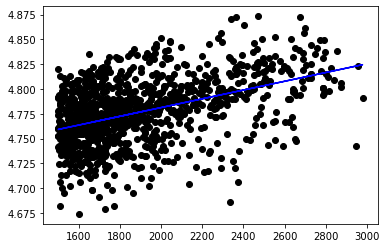

In [101]:
plt.plot(x_abv, lm.predict(x_abv), c='blue')
plt.scatter(x_abv, yta, c='black')
plt.show()

# Log Price

### Below Avg

In [102]:
lyb = pd.Series(np.log(y_blw))

In [103]:
lm.fit(x_blw, lyb)

LinearRegression()

In [104]:
print('r2:',lm.score(x_blw, lyb))
print('intercept:', lm.intercept_)
print('slope:',lm.coef_)

r2: 0.3424742310647486
intercept: 10.925389198101643
slope: [0.00077186]


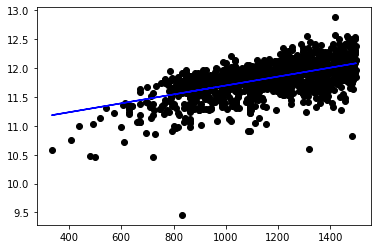

In [105]:
plt.plot(x_blw, lm.predict(x_blw), c='blue')
plt.scatter(x_blw, lyb, c='black')
plt.show()

### Above Avg

In [106]:
lya = pd.Series(np.log(y_abv))

In [107]:
lm.fit(x_abv, lya)

LinearRegression()

In [108]:
print('r2:',lm.score(x_abv, lya))
print('intercept:', lm.intercept_)
print('slope:',lm.coef_)

r2: 0.21097785773138267
intercept: 11.399807914320036
slope: [0.00045541]


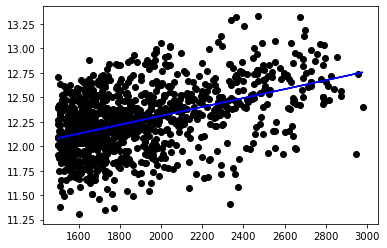

In [109]:
plt.plot(x_abv, lm.predict(x_abv), c='blue')
plt.scatter(x_abv, lya, c='black')
plt.show()